In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 12.9 MB/s 
     |████████████████████████████████| 9.9 MB 8.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
airline = pd.read_excel('Airlines+Data.xlsx',index_col ='Month',parse_dates = True)

In [6]:
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [8]:
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [9]:
airline.head(20)

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
1995-07-01,148
1995-08-01,148
1995-09-01,136


In [10]:
airline.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [11]:
airline.tail(20)

,Passengers
Month,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284


In [13]:
airline.shape

(96, 1)

In [14]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [15]:
airline.dtypes

Passengers    int64
dtype: object

In [16]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [17]:
airline.isnull().sum()

Passengers    0
dtype: int64

In [18]:
airline[airline.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


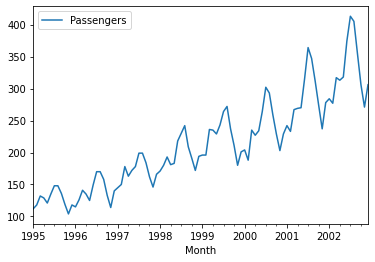

In [19]:
airline.plot()

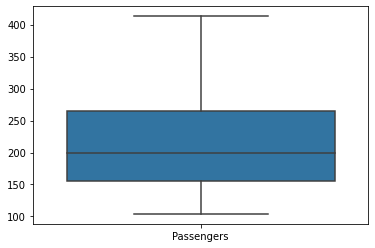

In [20]:
import seaborn as  sns
sns.boxplot(data =airline)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2bafc9950>]],
      dtype=object)

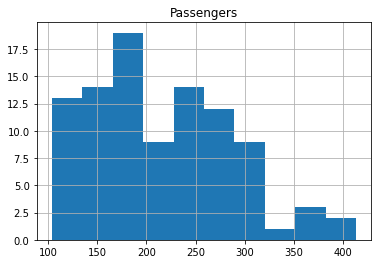

In [21]:
airline.hist()

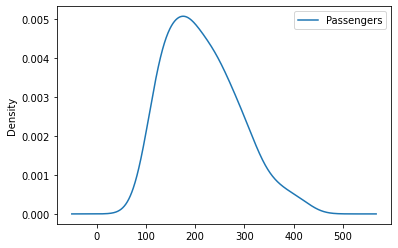

In [22]:
airline.plot(kind="kde")

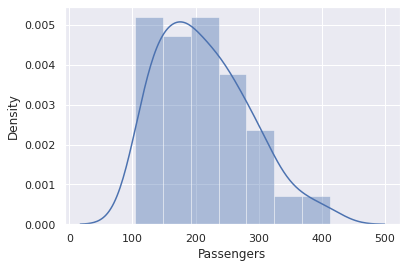

In [25]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(airline['Passengers'],kde=True)

In [34]:
import plotly.express as px


In [38]:
result = seasonal_decompose(airline['Passengers'], model ='multiplicative')

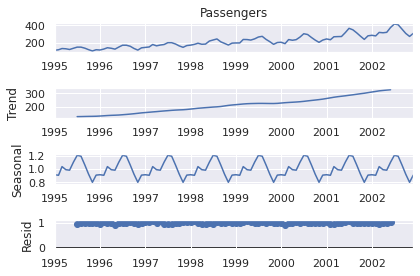

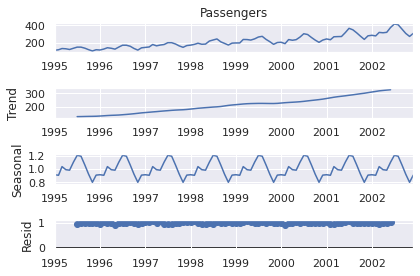

In [39]:
result.plot()

In [40]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.52 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [41]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Fri, 18 Nov 2022   AIC                            615.965
Time:                                    06:26:18   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing
  

In [43]:
# Fit a SARIMAX(1, 1, 0)x(1, 1, 0, 12)	 on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model = SARIMAX(train['Passengers'],order = (1, 1, 0), seasonal_order =(1, 1, 0, 12))

In [45]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -262.555
Date:                            Fri, 18 Nov 2022   AIC                            531.110
Time:                                    06:27:39   BIC                            537.898
Sample:                                01-01-1995   HQIC                           533.810
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377      0.108     -2.204      0.028      -0.449      -0.026
ar.S.L12      -0.2595      0.097     -2.685      0.007      -0.449      -0.070
sigma2        94.2022     16.779      5.614      0.000      61.315     127.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.60   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1

In [47]:
# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

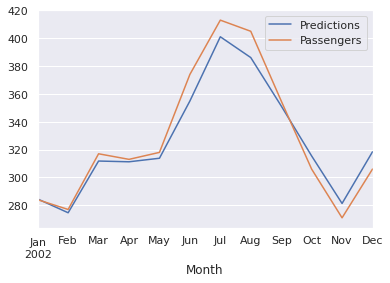

In [48]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [49]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [50]:
# Calculate root mean squared error
rmse(test["Passengers"], predictions)

10.331675977607135

In [51]:
#Forecast using ARIMA Model
# Train the model on the full dataset
model = model = SARIMAX(airline['Passengers'], 
                        order = (1, 1, 0), 
                        seasonal_order =(1, 1, 0, 12))

In [52]:
result = model.fit()

In [53]:
# Forecast for the next 5 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 5 * 12, 
                          typ = 'levels').rename('Forecast')

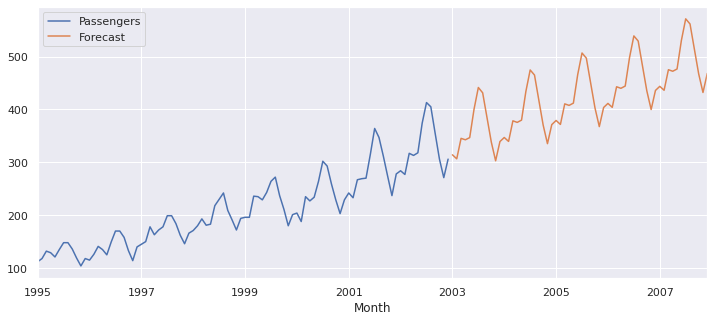

In [54]:
# Plot the forecast values
airline['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)